The visualization methods implemented in PEtab Select are demonstrated here. These methods generally visualize the output of a model selection task, so the input is generally a list of already-calibrated models. Here, some calibrated models that were saved to disk with `petab_select.model.models_to_yaml_list` are loaded and used as input.

In [1]:
import petab_select

models = petab_select.models_from_yaml_list(
    model_list_yaml="calibrated_models/calibrated_models.yaml"
)

The model IDs were automatically generated, so we set them to something more readable here: a binary string that describes their position in the model space.

In [2]:
for model in models:
    model.model_id = "M_" + "".join(
        "1" if value == petab_select.ESTIMATE else "0"
        for value in model.parameters.values()
    )

# Selected models

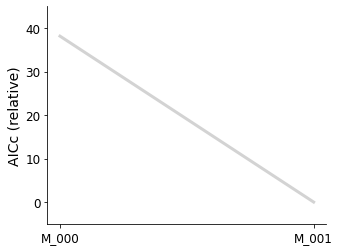

In [3]:
petab_select.plot.line_selected(
    models=models,
    criterion=petab_select.Criterion.AICC,
);

# Selection history trajectory

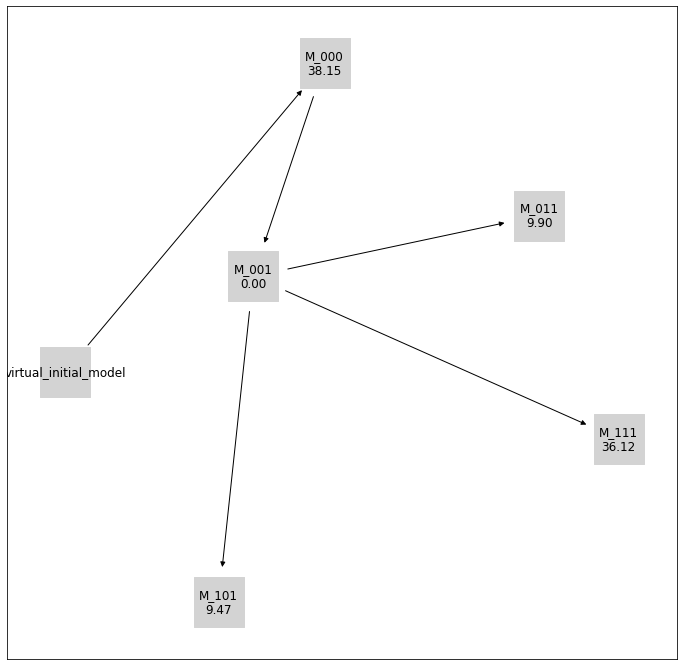

In [4]:
petab_select.plot.graph_history(
    models=models,
    criterion=petab_select.Criterion.AICC,
);

# Criterion values of each model

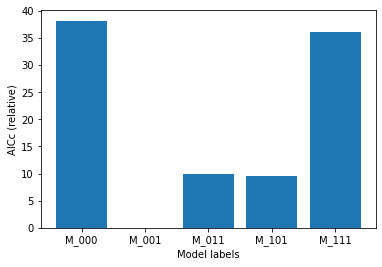

In [5]:
petab_select.plot.bar_criterion_vs_models(
    models=models,
    criterion=petab_select.Criterion.AICC,
);

# Criterion values vs. number of estimated parameters

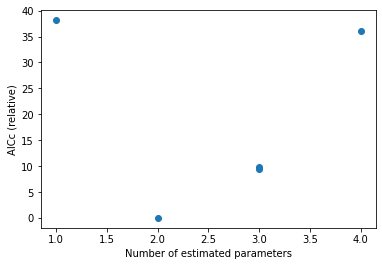

In [6]:
petab_select.plot.scatter_criterion_vs_n_estimated(
    models=models,
    criterion=petab_select.Criterion.AICC,
);

# Iterations as layers in a hierarchical graph

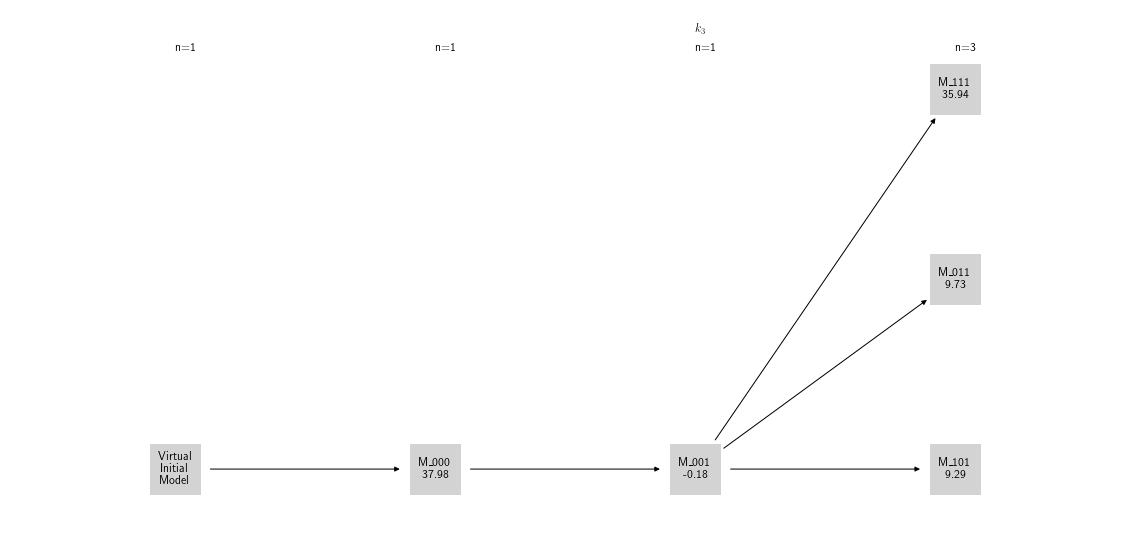

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

petab_select.plot.graph_iteration_layers(
    models=models,
    criterion=petab_select.Criterion.AICC,
);